In [1]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
fb1=pd.read_csv('nysu_10902_2019立委_research.csv')
fb2=pd.read_csv('nysu_10902_2019_research_right.csv')
fb=pd.merge(fb1,fb2,how="outer")
politics = pd.read_csv('9th_legislator_promise.csv')

以台南市第三選區立委陳亭妃為例，依照月份來統計數值資料的變化

In [2]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [3]:
#政見 有哪些立委
politics['姓名'].unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [4]:
#fb 總共有哪些立委
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘'], dtype=object)

In [5]:
chen = fb[fb.page_name == "陳亭妃"]
# 把時間格式轉換
chen['new_date'] = pd.to_datetime(chen['created_time_taipei']).dt.date
chen['post_hour'] = pd.to_datetime(chen['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
chen['month_year'] = pd.to_datetime(chen['new_date']).dt.to_period('M')
chen.head(1)

<ipython-input-5-4fd6dd8d772c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen['new_date'] = pd.to_datetime(chen['created_time_taipei']).dt.date
<ipython-input-5-4fd6dd8d772c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen['post_hour'] = pd.to_datetime(chen['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-5-4fd6dd8d772c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
5922,111224078898553_2159899594030981,111224078898553,陳亭妃,政治人物,事實證明了，我們大家當初的堅持是沒有錯的！\n\n管中閔非法兼職一直以來都是既有事實，但有心...,NaN,link,https://www.facebook.com/111224078898553/posts...,2019-01-15T07:01:12+0000,2019-01-15T15:01:12,...,0,0,0,0,0,59,36,2019-01-15,15,2019-01


In [6]:
#發文時間分佈
post_time = chen[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,1
1,1,1
2,3,1
3,5,6
4,6,20
5,7,35
6,8,29
7,9,36
8,10,34
9,11,37


In [7]:
chen[chen.created_time_taipei == max(chen.created_time_taipei)]
#找出時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
6375,111224078898553_594882728015592,111224078898553,陳亭妃,政治人物,顧台灣 作伙行\n就是現在，徛出來！甲咱作伙行！作伙守護台灣！\n\n③ 陳亭妃 ③ 蔡英文...,陳亭妃的直播影片。,video,https://www.facebook.com/fififans/videos/59488...,2020-01-10T11:06:32+0000,2020-01-10T19:06:32,...,0,0,0,0,0,228,40,2020-01-10,19,2020-01


In [8]:
chen[chen.created_time_taipei == min(chen.created_time_taipei)]
#找出時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
5927,111224078898553_2141770972510510,111224078898553,陳亭妃,政治人物,面對中國不斷的文攻武嚇，身為台灣人的我們，該做的絕對不是卑躬屈膝！\n\n＃台灣中國一邊一國...,NaN,link,https://www.facebook.com/111224078898553/posts...,2019-01-02T12:25:28+0000,2019-01-02T20:25:28,...,0,0,0,0,0,24,12,2019-01-02,20,2019-01


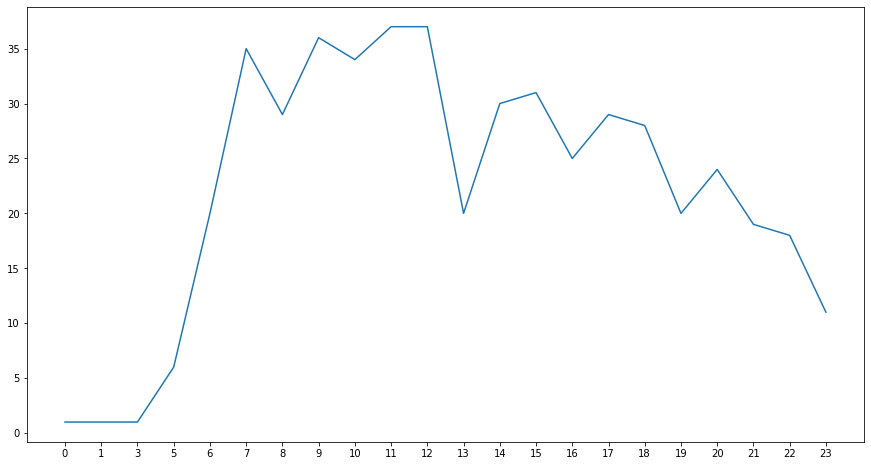

In [9]:
#畫出整年貼文分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

In [10]:
#整年貼文數量分佈
whole_year = chen[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,18
1,2019-02,16
2,2019-03,34
3,2019-04,20
4,2019-05,22
5,2019-06,26
6,2019-07,28
7,2019-08,50
8,2019-09,43
9,2019-10,66


In [11]:
#每個月平均發文數量統計值
whole_year.describe()

,post_id
count,13.000000
mean,37.846154
std,20.747876
min,16.000000
25%,22.000000
50%,28.000000
75%,50.000000
max,74.000000


In [12]:
results = chen.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-01,2002033420173954,13078,0,0,0,0,0,921,467,271
2019-02,1779585262376848,12376,0,0,0,0,0,1118,254,256
2019-03,3781618682550802,29350,0,0,0,0,0,2716,542,469
2019-04,2224481577971060,30125,0,0,0,0,0,2028,383,216
2019-05,2446929735768166,42679,0,0,0,0,0,3450,538,239
2019-06,2891826051362378,37857,0,0,0,0,0,2071,775,396
2019-07,3114274209159484,38827,0,0,0,0,0,2108,811,428
2019-08,5561203944927650,107186,0,0,0,0,0,4008,1139,660
2019-09,4782635392637779,68870,0,0,0,0,0,2821,719,572


In [13]:
results.index.name = 'newhead' #將上行定義出的results索引標籤命名為newhead
results.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列，個人覺得意義不大
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,2002033420173954,13078,0,0,0,0,0,921,467,271
1,2019-02,1779585262376848,12376,0,0,0,0,0,1118,254,256
2,2019-03,3781618682550802,29350,0,0,0,0,0,2716,542,469
3,2019-04,2224481577971060,30125,0,0,0,0,0,2028,383,216
4,2019-05,2446929735768166,42679,0,0,0,0,0,3450,538,239
5,2019-06,2891826051362378,37857,0,0,0,0,0,2071,775,396
6,2019-07,3114274209159484,38827,0,0,0,0,0,2108,811,428
7,2019-08,5561203944927650,107186,0,0,0,0,0,4008,1139,660
8,2019-09,4782635392637779,68870,0,0,0,0,0,2821,719,572
9,2019-10,7340789207304498,117788,0,0,0,0,0,5044,1472,786


In [14]:
results['newhead'].map(str)#將索引標籤newhead那欄中所有資料轉為字串格式

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: newhead, dtype: object

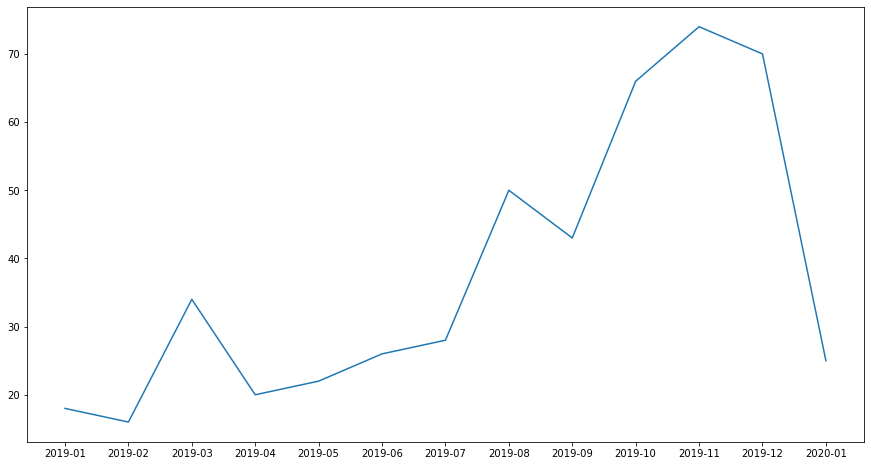

In [15]:
#畫出整年貼文分佈
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, whole_year['post_id'])

plt.show()

In [16]:
# 每個月的按讚、評論、分享總數 分佈
results = chen.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,2002033420173954,13078,0,0,0,0,0,921,467,271
1,2019-02,1779585262376848,12376,0,0,0,0,0,1118,254,256
2,2019-03,3781618682550802,29350,0,0,0,0,0,2716,542,469
3,2019-04,2224481577971060,30125,0,0,0,0,0,2028,383,216
4,2019-05,2446929735768166,42679,0,0,0,0,0,3450,538,239
5,2019-06,2891826051362378,37857,0,0,0,0,0,2071,775,396
6,2019-07,3114274209159484,38827,0,0,0,0,0,2108,811,428
7,2019-08,5561203944927650,107186,0,0,0,0,0,4008,1139,660
8,2019-09,4782635392637779,68870,0,0,0,0,0,2821,719,572
9,2019-10,7340789207304498,117788,0,0,0,0,0,5044,1472,786


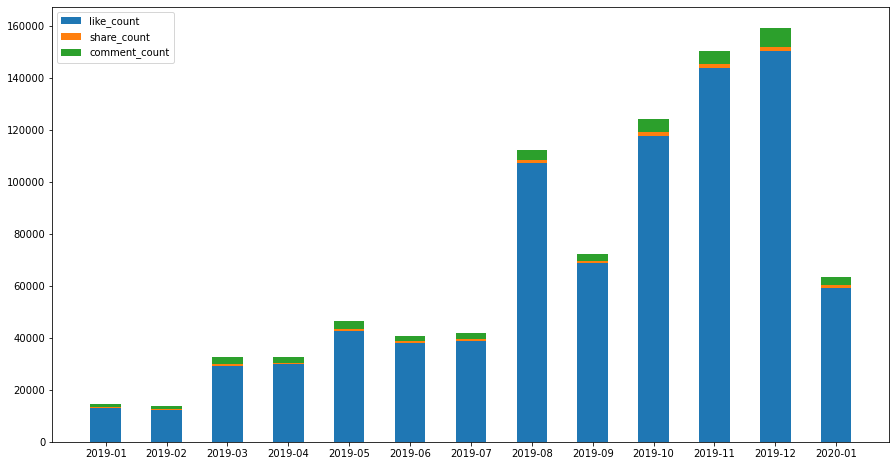

In [17]:
#整年按讚、評論、分享數

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
#ax.plot(labels, whole_year['post_id'])

ax.legend()
plt.show()

In [19]:
# 很明顯8月按讚、分享、評論數特別高，因此找出8月的資料
high = chen[chen.month_year == "2019-08"]
results_high = high.groupby('new_date').sum()
results_high.index.name = 'newhead' #更改欄位名稱
results_high.reset_index(inplace=True)
results_high

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-08-01,111224078898553,1104,0,0,0,0,0,25,11,17
1,2019-08-02,222448157797106,3094,0,0,0,0,0,99,27,37
2,2019-08-03,222448157797106,2908,0,0,0,0,0,65,50,25
3,2019-08-04,333672236695659,14359,0,0,0,0,0,416,224,47
4,2019-08-05,222448157797106,2133,0,0,0,0,0,44,47,28
5,2019-08-06,222448157797106,6038,0,0,0,0,0,145,79,28
6,2019-08-07,222448157797106,3900,0,0,0,0,0,106,25,28
7,2019-08-08,222448157797106,4793,0,0,0,0,0,166,18,14
8,2019-08-09,111224078898553,868,0,0,0,0,0,19,11,18
9,2019-08-10,111224078898553,799,0,0,0,0,0,26,6,15


No handles with labels found to put in legend.


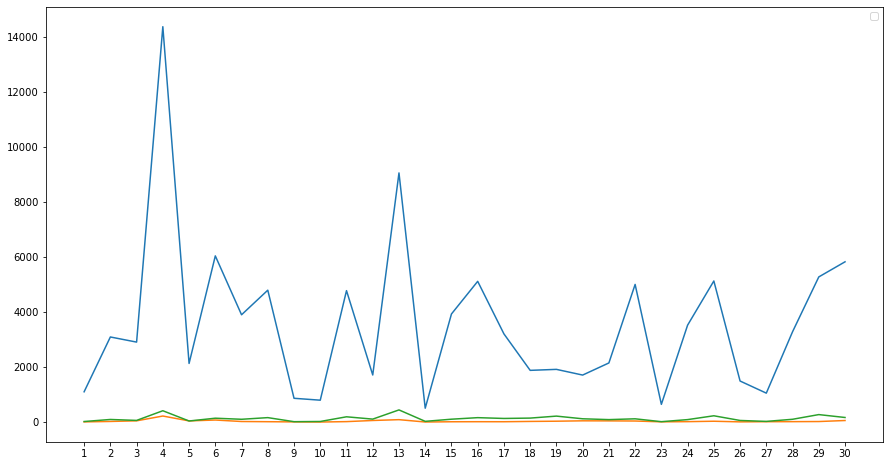

In [20]:
#畫圖 看整個八月按讚、分享、評論的流量
labels = [str(i) for i in range(1,31)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

In [21]:
# 8/4 號很明顯按讚最高  因此找出這天的文章
chen['new_date']=chen['new_date'].map(str) # turn 'new_date' into str
Aug_04 = chen[chen['new_date'] == "2019-08-04"]
Aug_04[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-21-fd14d33afaac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen['new_date']=chen['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
6098,我們把世界冠軍留在台灣了🏆🏆🏆 謝謝優秀的台灣小將！ 今天這份榮耀絕對是屬於你們的！ ...,139,6044
6099,U12台灣小將加油！把冠軍留在台灣！ 📌線上直播網址：http://bit.ly/2KBIf7J,155,3878
6100,早安好友們！緊急號召！ 今晚U12冠亞軍總決賽是由地主台灣對上日本隊，記得準時上線幫台灣小...,122,4437


In [22]:
#找出評論數量的統計值
chen['comment_count'].describe()

count     492.000000
mean       85.093496
std        95.104848
min         6.000000
25%        27.750000
50%        55.000000
75%       104.250000
max      1019.000000
Name: comment_count, dtype: float64

In [23]:
#找出按讚數量的統計值
chen['like_count'].describe()


count     492.000000
mean     1730.747967
std      1409.379609
min       180.000000
25%       762.500000
50%      1268.000000
75%      2234.000000
max      8037.000000
Name: like_count, dtype: float64

In [24]:
# 比較、查看他政見
promise = politics[politics.姓名 == "陳亭妃"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['57    堅持台灣主體性，強化國家競爭力與國際連結，力推台灣成為正常化國家', '一、推動完成18歲公民權...']

In [25]:
#按讚次數最少的貼文 
lastlike_10 = chen.sort_values(by = ['like_count'],ascending = True).head(10)
lastlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
5987,我今天針對中國最大的影音串流平台「騰訊視頻」將循「愛奇藝」模式來台質詢、提醒經濟部部長沈榮津...,180,2019-03
6130,中秋立委不烤肉，玩起交換禮物⁉ 12立委禮物大PK直播來囉！ 看看大家到底拿出什麼壓箱...,194,2019-09
5959,▶ #三立前進新台灣 Part 2,211,2019-03
6063,#假新聞清潔劑 是一個致力於預防假消息的街頭行動團體，對不熟悉網路世界的長輩們來說，假新聞其...,218,2019-07
5968,每年電價的調漲與否，一直以來都是大家最關心的民生議題。 所以在經濟委員會質詢時，我特地請經...,225,2019-03
5993,經濟委員會質詢農委會陳吉仲主委-如何防治假消息.假新聞 亭妃除提出「農產品市場交易法第六條...,237,2019-04
5962,砂石與混泥土價格上漲的問題已經1、2個月了，到底合不合理，是否有壟斷？公平會尚未有答案 而...,242,2019-03
5956,元宵燈籠DIY•健康親子樂 陳亭妃熱情邀請您 同樂慶元宵 時間：2/17週日上午10點到1...,251,2019-02
6026,針對「台北市雙子星聯合開發案是否涉及中資介入及國安問題等爭議」質詢經濟部,275,2019-05
6195,早安！ 天天教師節，一定要和好友們分享一段超可愛的影片，祝福老師天天快樂！,276,2019-09


In [26]:
#陳亭妃的最少讚數前10的文章的 種類 video / photo?
lastlike_10 = chen.sort_values(by = ['like_count'],ascending= True ).head(10)
lastlike_10.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
link,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
video,9,9,9,9,9,4,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [27]:
#按讚次數最多的貼文 
mostlike_10 = chen.sort_values(by = ['like_count'],ascending = False).head(10)
mostlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
6305,妃妃去哪兒Part2 你有遇到我嗎😍 #妃妃去哪兒 #停紅燈請注意 #野生妃妃,8037,2019-11
6295,謝謝大家的參與，今天「妃妃姐姐親子活力派對」大爆滿‼ 亭妃化身孩子王也玩得好開心😁不要忘記1...,7864,2019-11
6083,雨衣、雨鞋全副武裝跑行程，瞭解各區狀況！,7187,2019-08
6278,嗨！今天的妃妃姐姐派對好玩嗎？不能來也沒關係，現場花絮報你搶先看喔☺ · ...,6970,2019-11
6397,我們需要乾淨的選舉～拒絕攻擊、拒絕抹黑、拒絕賄選，懇請支持33連線顧台灣一世人的3號蔡英文、...,6964,2020-01
6340,最貼心的老朋友，當我拿出3號的文宣面紙時，他也拿出了一包我4年前一樣抽中3號的文宣面紙，真是...,6684,2019-12
6098,我們把世界冠軍留在台灣了🏆🏆🏆 謝謝優秀的台灣小將！ 今天這份榮耀絕對是屬於你們的！ ...,6044,2019-08
6184,昨天助理跟著我衝、衝、衝了一整天， 怕他們太累，嚇到了！ 所以今天的第一個行程呢.... 哈...,5983,2019-10
6314,衷心感謝今天到場相挺的好友，以及在線上為我加油打氣的大家。現場湧入超過一萬五千名鄉親，讓亭妃...,5784,2019-12
6137,已經一直衝衝衝了！但還是有很多中秋節的活動趕不及，真的很不好意思！跑到最後都只剩下黑鴉鴉一片...,5599,2019-09


In [28]:
#陳亭妃的最多讚數前10的文章的 種類 video / photo?
mostlike_10 = chen.sort_values(by = ['like_count'],ascending= False ).head(10)
mostlike_10.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
photo,6,6,6,6,6,1,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
video,4,4,4,4,4,1,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [29]:
# 很明顯10月按讚、分享、評論數開始上升，因此找出10月的資料
highest = chen[chen.month_year == "2019-10"]
results_highest = highest.groupby('new_date').sum()
results_highest.index.name = 'newhead' #更改欄位名稱
results_highest.reset_index(inplace=True)
results_highest

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-10-01,111224078898553,390,0,0,0,0,0,22,2,12
1,2019-10-02,222448157797106,4749,0,0,0,0,0,209,30,14
2,2019-10-03,222448157797106,4405,0,0,0,0,0,396,76,27
3,2019-10-04,111224078898553,1917,0,0,0,0,0,121,42,13
4,2019-10-05,111224078898553,4676,0,0,0,0,0,86,37,18
5,2019-10-06,222448157797106,7488,0,0,0,0,0,304,43,24
6,2019-10-07,111224078898553,806,0,0,0,0,0,30,9,20
7,2019-10-09,222448157797106,1815,0,0,0,0,0,73,20,15
8,2019-10-10,333672236695659,7236,0,0,0,0,0,240,58,32
9,2019-10-11,222448157797106,3321,0,0,0,0,0,85,63,24


No handles with labels found to put in legend.


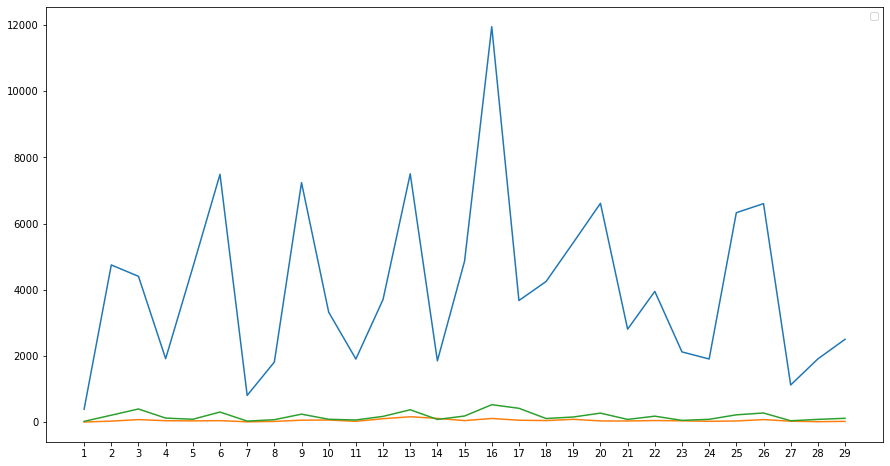

In [30]:
#畫圖 看整個月按讚、分享、評論的流量
labels = [str(i) for i in range(1,30)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_highest['like_count'])
ax.plot(labels, results_highest['share_count'])
ax.plot(labels, results_highest['comment_count'])

ax.legend()

plt.show()

In [31]:
#10/17號很明顯按讚最高  因此找出這天的文章
chen['new_date']=chen['new_date'].map(str) # turn 'new_date' into str
Oct_17 = chen[chen['new_date'] == "2019-10-17"]
Oct_17[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-31-193d8a2d9cd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen['new_date']=chen['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
6220,🏆還記得亭妃勇奪中秋節歌唱大賽冠軍嗎？即將舉辦台灣頸枕抽獎活動囉！ 預...,58,1927
6221,【你真的有夥伴嗎?】 2020藍綠對決，國民黨總統候選人韓國瑜目前民調落後對手蔡英文，接下...,25,851
6222,在亭妃極力爭取之下，自來水公司編列7400萬元、安南區受益用水戶數7500戶居民的汰換老舊自...,22,675
6223,早安！ 台灣隊的夥伴們 加油！加油！加油！,159,4226
6224,猜猜我在哪裡？ 沒錯！就是在客運上.... 雖然最晚一班高鐵沒搭上，但還是有另一種交通工具...,262,4270


1. 曝光度高多為在地深耕
2. 幾篇總統帶小雞
3. 較無中國因素